In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tree import Tree
import tree_to_prism as tp
import random

In [2]:
file = 'tree/Message_PGP.xml'
tree = Tree()
tree = tp.parse_file(file)
tree.root.to_string()

'Label: ReadamessageencryptedwithPGP.\nRefinement: disjunctive\nType: Goal\nAction: \nCost: \nRole: Attacker'

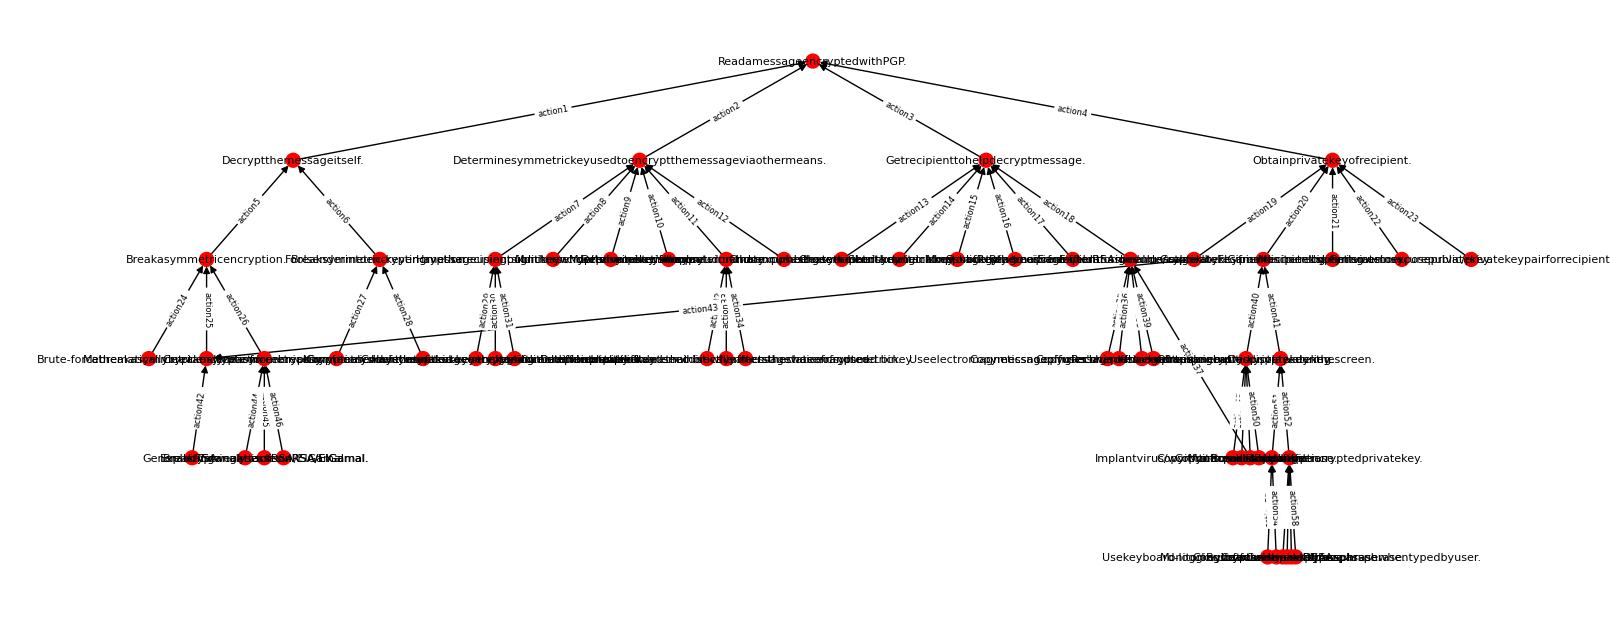

In [3]:
G = tree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = tree.hierarchy_pos(G, tree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    colors.append(G.nodes[node]['color']) 
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [4]:
df = tree.to_dataframe()
print(df.shape)
df.head()

(59, 8)


,Label,Refinement,Type,Action,Cost,Role,Parent,Children
0,ReadamessageencryptedwithPGP.,disjunctive,Goal,,,Attacker,None,"{Getrecipienttohelpdecryptmessage., Determines..."
1,Decryptthemessageitself.,disjunctive,Attribute,action1,270,Attacker,ReadamessageencryptedwithPGP.,"{Breakasymmetricencryption., Breaksymmetric-ke..."
2,Determinesymmetrickeyusedtoencryptthemessagevi...,disjunctive,Attribute,action2,455,Attacker,ReadamessageencryptedwithPGP.,"{Monitorsender'scomputermemory., Foolsenderint..."
3,Getrecipienttohelpdecryptmessage.,disjunctive,Attribute,action3,85,Attacker,ReadamessageencryptedwithPGP.,"{Sendtheoriginalmessagetotherecipient., Chosen..."
4,Obtainprivatekeyofrecipient.,disjunctive,Attribute,action4,164,Attacker,ReadamessageencryptedwithPGP.,"{Monitorrecipient'smemory., Generateinsecurepu..."


In [9]:
# show the label of nodes that appear more than once
df[df.duplicated(subset='Label', keep=False)]

,Label,Refinement,Type,Action,Cost,Role,Parent,Children
19,FactorRSAmodulus/calculateElGamaldiscretelog.,conjunctive,Action,action19,414,Attacker,Obtainprivatekeyofrecipient.,{}
37,Monitornetworktraffic.,conjunctive,Action,action37,320,Attacker,Readmessageafterithasbeendecryptedbyrecipient.,{}
43,FactorRSAmodulus/calculateElGamaldiscretelog.,conjunctive,Action,action43,80,Attacker,Mathematicallybreakasymmetricencryption.,{}
49,Monitornetworktraffic.,conjunctive,Action,action49,417,Attacker,Obtainencryptedprivatekeyring.,{}
